# CAFE verification example_light_EL

In example EL

we propose a pure spectral advection (energy loss) testing case with (1+n) dimension setting

the PDE equation reads

$-\nabla_\mathbf{E}\cdot(\mathcal{E}_{\mathbf{qq}} u) = f(\mathbf{q})$, $E_i = e^{q_i}$

we apply homogeneous Dirichlet boundary condition in $\mathbf{x}$ domain

$u = 0$, $\mathbf{q}\in\Omega^+_q$

By imposing an analytical solution

$u(\xi) = Ce^{-n_\xi(\xi - \xi_{min})} + \frac{e^{\xi_\min(n_\xi+s_\xi)}}{\alpha_\xi(s_\xi-1)}e^{\xi(1-s_\xi-n_\xi)}$

we can derive $f(\mathbf{q})$ (and $C$) manually from $u(\mathbf{x}) = \prod_\xi u(\xi)$

here we present comparison and relative error estimation between analytical and numerical solutions

* $\xi_{min} = -1$, $\xi_{max} = 1$
* $E_{ii} = -\alpha_i e^{n_i(q_i-q_{i,min})}$

the final L2 errors are estimated internally with deal.II functions

## 1. time-independent solver

Populating the interactive namespace from numpy and matplotlib


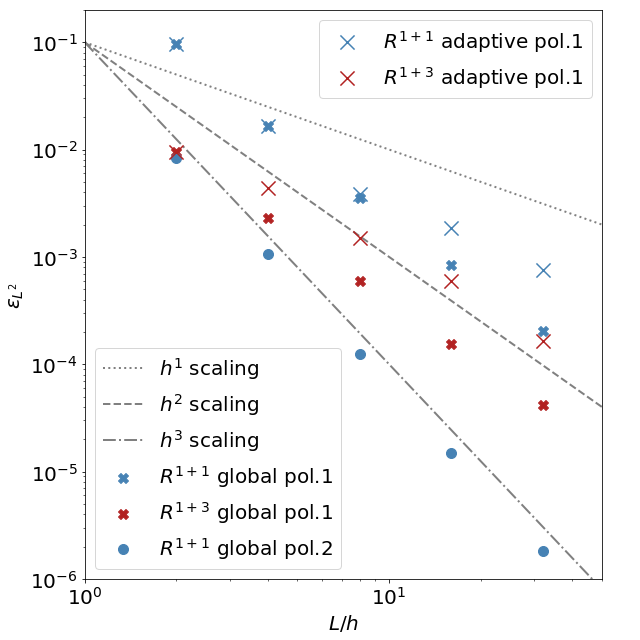

In [1]:
%pylab inline
import matplotlib.pyplot as plt
# error list copied from Dxxtrial output

# dim 1+1
# refine global
# pol. 1
e_1d_rg1 = array(matrix('0    0.0963859;\
1    0.016603;\
2    0.00355481;\
3    0.000836782;\
4    0.000203894'))

# dim 1+1
# refine adaptive
# pol. 1
e_1d_ra1 = array(matrix('0    0.0963859;\
1    0.016603;\
2    0.00387057;\
3    0.00186111;\
4    0.000760538'))

# dim 1+1
# refine global
# pol. 2
e_1d_rg2 = array(matrix('0    0.0083933;\
1    0.00106049;\
2    0.000124651;\
3    1.49446e-05;\
4    1.82549e-06'))

# error list copied from Dxxtrial output

# dim 1+3
# refine adaptive
# pol. 1
e_3d_ra1 = array(matrix('0    0.00947488;\
1    0.00440104;\
2    0.00150723;\
3    0.000600534;\
4    0.000165424'))

e_3d_rg1 = array(matrix('0    0.00947488;\
1    0.00231517;\
2    0.000591311;\
3    0.000153409;\
4    0.000041648'))

fig1, ax1 = plt.subplots(figsize=(9,9))

g1 = ax1.scatter(2**(e_1d_rg1[:,0]+1),e_1d_rg1[:,1],marker='X',s=100,c='steelblue',label='$R^{1+1}$ global pol.1')
g3 = ax1.scatter(2**(e_3d_rg1[:,0]+1),e_3d_rg1[:,1],marker='X',s=100,c='firebrick',label='$R^{1+3}$ global pol.1')

g12 = ax1.scatter(2**(e_1d_rg2[:,0]+1),e_1d_rg2[:,1],marker='o',s=100,c='steelblue',label='$R^{1+1}$ global pol.2')

x0 = linspace(1,300,20)
l1 = ax1.plot(x0,0.1/x0**1,color='grey',linestyle=':',linewidth=2,label='$h^{1}$ scaling')
l2 = ax1.plot(x0,0.1/x0**2,color='grey',linestyle='--',linewidth=2,label='$h^{2}$ scaling')
l3 = ax1.plot(x0,0.1/x0**3,color='grey',linestyle='-.',linewidth=2,label='$h^{3}$ scaling')
ax1.set_xscale("log", nonposx='clip')
ax1.set_yscale("log", nonposy='clip')

ax1.legend(loc=3,fontsize='20')
ax1.set_xlim((1,50))
ax1.set_ylim((1.e-6,0.2))
ax1.set_xlabel('$L/h$',fontsize='20')
ax1.set_ylabel('$\epsilon_{L^2}$',fontsize='20')
ax1.tick_params(axis='both', which='major', labelsize='20')

ax2 = ax1.twinx()
a1 = ax2.scatter(2**(e_1d_ra1[:,0]+1),e_1d_ra1[:,1],marker='x',s=200,c='steelblue',label='$R^{1+1}$ adaptive pol.1')
a3 = ax2.scatter(2**(e_3d_ra1[:,0]+1),e_3d_ra1[:,1],marker='x',s=200,c='firebrick',label='$R^{1+3}$ adaptive pol.1')
ax2.set_yscale('log', nonposy='clip')
ax2.set_ylim((1.e-6,0.2))
ax2.legend(loc=1,fontsize='20')
plt.axis('off')

fig1.tight_layout()

savefig('EL_err.pdf')

## 2. time-dependent solver

#### fixed time difference (evolution check)

Populating the interactive namespace from numpy and matplotlib
[ 2.13818384  2.0231496   2.00493409  2.00116036  2.00028268]


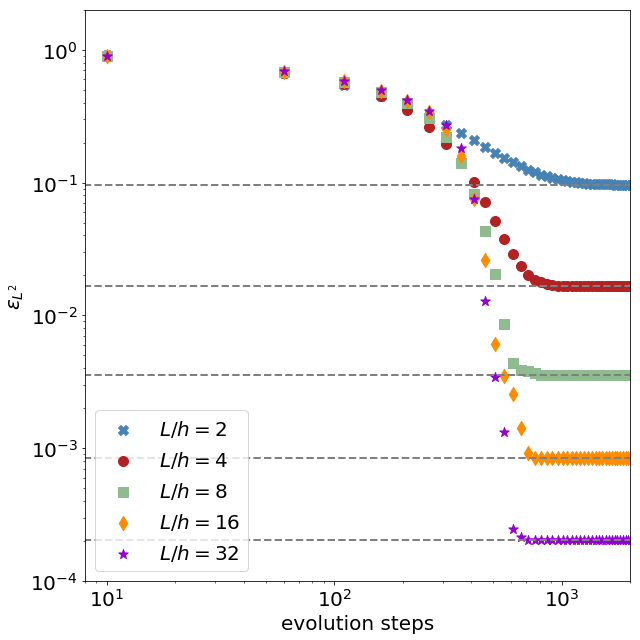

In [2]:
%pylab inline
import matplotlib.pyplot as plt

threads = linspace(1,20,num=20)

err_lv0 = array(matrix('10	0.916381;\
60	0.671066;\
110	0.539412;\
160	0.446346;\
210	0.374953;\
260	0.318603;\
310	0.273691;\
360	0.237798;\
410	0.209115;\
460	0.186217;\
510	0.167963;\
560	0.153428;\
610	0.141866;\
660	0.132673;\
710	0.125364;\
760	0.11955;\
810	0.114922;\
860	0.111234;\
910	0.108291;\
960	0.10594;\
1010	0.10406;\
1060	0.102554;\
1110	0.101347;\
1160	0.100378;\
1210	0.0995997;\
1260	0.0989741;\
1310	0.098471;\
1360	0.098066;\
1410	0.0977401;\
1460	0.0974775;\
1510	0.097266;\
1560	0.0970955;\
1610	0.0969581;\
1660	0.0968474;\
1710	0.0967581;\
1760	0.0966861;\
1810	0.096628;\
1860	0.0965812;\
1910	0.0965434;\
1960	0.0965129;\
2010	0.0964884;\
2060	0.0964685'))

err_lv1 = array(matrix('10	0.903699;\
60	0.673429;\
110	0.552271;\
160	0.447037;\
210	0.34969;\
260	0.264662;\
310	0.19507;\
360	0.141;\
410	0.100657;\
460	0.0715594;\
510	0.051242;\
560	0.0375608;\
610	0.0287553;\
660	0.0233914;\
710	0.0203044;\
760	0.0186045;\
810	0.0176885;\
860	0.0171954;\
910	0.016927;\
960	0.0167791;\
1010	0.016697;\
1060	0.0166514;\
1110	0.0166264;\
1160	0.016613;\
1210	0.0166062;\
1260	0.0166029;\
1310	0.0166016;\
1360	0.0166012;\
1410	0.0166013;\
1460	0.0166016;\
1510	0.0166019;\
1560	0.0166022;\
1610	0.0166024;\
1660	0.0166026;\
1710	0.0166027;\
1760	0.0166028;\
1810	0.0166029;\
1860	0.0166029;\
1910	0.016603;\
1960	0.016603;\
2010	0.016603;\
2060	0.016603'))

err_lv2 = array(matrix('10	0.901979;\
60	0.679612;\
110	0.569913;\
160	0.483075;\
210	0.399269;\
260	0.30941;\
310	0.219384;\
360	0.14122;\
410	0.0824083;\
460	0.0434009;\
510	0.0203982;\
560	0.00865305;\
610	0.00439416;\
660	0.00384851;\
710	0.00379662;\
760	0.00367436;\
810	0.00357806;\
860	0.00354031;\
910	0.0035375;\
960	0.00354513;\
1010	0.00355201;\
1060	0.00355569;\
1110	0.00355691;\
1160	0.00355686;\
1210	0.00355636;\
1260	0.00355583;\
1310	0.00355541;\
1360	0.00355512;\
1410	0.00355495;\
1460	0.00355486;\
1510	0.00355482;\
1560	0.0035548;\
1610	0.0035548;\
1660	0.0035548;\
1710	0.0035548;\
1760	0.00355481;\
1810	0.00355481;\
1860	0.00355481;\
1910	0.00355481;\
1960	0.00355481;\
2010	0.00355481;\
2060	0.00355481'))

err_lv3 = array(matrix('10	0.902227;\
60	0.686852;\
110	0.578484;\
160	0.492545;\
210	0.41537;\
260	0.340493;\
310	0.254373;\
360	0.157757;\
410	0.0756488;\
460	0.0260788;\
510	0.00603697;\
560	0.00348536;\
610	0.002556;\
660	0.00141059;\
710	0.000913205;\
760	0.000842493;\
810	0.000841149;\
860	0.00083952;\
910	0.000837839;\
960	0.000837051;\
1010	0.000836797;\
1060	0.000836749;\
1110	0.000836757;\
1160	0.000836771;\
1210	0.000836779;\
1260	0.000836782;\
1310	0.000836783;\
1360	0.000836783;\
1410	0.000836782;\
1460	0.000836782;\
1510	0.000836782;\
1560	0.000836782;\
1610	0.000836782;\
1660	0.000836782;\
1710	0.000836782;\
1760	0.000836782;\
1810	0.000836782;\
1860	0.000836782;\
1910	0.000836782;\
1960	0.000836782;\
2010	0.000836782;\
2060	0.000836782'))

err_lv4 = array(matrix('10	0.903133;\
60	0.68984;\
110	0.582787;\
160	0.498276;\
210	0.422261;\
260	0.348538;\
310	0.273307;\
360	0.181285;\
410	0.0746344;\
460	0.0127283;\
510	0.00346053;\
560	0.00131284;\
610	0.000244478;\
660	0.000212815;\
710	0.000204593;\
760	0.000203849;\
810	0.000203873;\
860	0.000203893;\
910	0.000203895;\
960	0.000203894;\
1010	0.000203894;\
1060	0.000203894;\
1110	0.000203894;\
1160	0.000203894;\
1210	0.000203894;\
1260	0.000203894;\
1310	0.000203894;\
1360	0.000203894;\
1410	0.000203894;\
1460	0.000203894;\
1510	0.000203894;\
1560	0.000203894;\
1610	0.000203894;\
1660	0.000203894;\
1710	0.000203894;\
1760	0.000203894;\
1810	0.000203894;\
1860	0.000203894;\
1910	0.000203894;\
1960	0.000203894;\
2010	0.000203894;\
2060	0.000203894'))

e_1d_rg1 = array(matrix('0    0.0963859;\
1    0.016603;\
2    0.00355481;\
3    0.000836782;\
4    0.000203894'))

print (2**(e_1d_rg1[:,1]+1))

fig1, ax1 = plt.subplots(figsize=(9,9))

l0 = ax1.plot((0,2000),(e_1d_rg1[0,1],e_1d_rg1[0,1]),color='grey',linestyle='--',linewidth=2)
l1 = ax1.plot((0,2000),(e_1d_rg1[1,1],e_1d_rg1[1,1]),color='grey',linestyle='--',linewidth=2)
l2 = ax1.plot((0,2000),(e_1d_rg1[2,1],e_1d_rg1[2,1]),color='grey',linestyle='--',linewidth=2)
l3 = ax1.plot((0,2000),(e_1d_rg1[3,1],e_1d_rg1[3,1]),color='grey',linestyle='--',linewidth=2)
l4 = ax1.plot((0,2000),(e_1d_rg1[4,1],e_1d_rg1[4,1]),color='grey',linestyle='--',linewidth=2)

c0 = ax1.scatter (err_lv0[:,0],err_lv0[:,1],marker='X',s=100,c='steelblue',label='$L/h = 2$')
c1 = ax1.scatter (err_lv1[:,0],err_lv1[:,1],marker='o',s=100,c='firebrick',label='$L/h = 4$')
c2 = ax1.scatter (err_lv2[:,0],err_lv2[:,1],marker='s',s=100,c='darkseagreen',label='$L/h = 8$')
c3 = ax1.scatter (err_lv3[:,0],err_lv3[:,1],marker='d',s=100,c='darkorange',label='$L/h = 16$')
c4 = ax1.scatter (err_lv4[:,0],err_lv4[:,1],marker='*',s=100,c='darkviolet',label='$L/h = 32$')
ax1.legend(loc=3,fontsize='20')
ax1.set_xlim((8,2000))
ax1.set_ylim((0.0001,2))
ax1.set_xscale("log", nonposx='clip')
ax1.set_yscale("log", nonposy='clip')
ax1.set_xlabel('evolution steps',fontsize='20')
ax1.set_ylabel('$\epsilon_{L^2}$',fontsize='20')
ax1.tick_params(axis='both', which='major', labelsize='20')

fig1.tight_layout()

savefig('EL_evo.pdf')

#### fixed time difference (evolution check)

Populating the interactive namespace from numpy and matplotlib
[ 2.13818384  2.0231496   2.00493409  2.00116036  2.00028268]


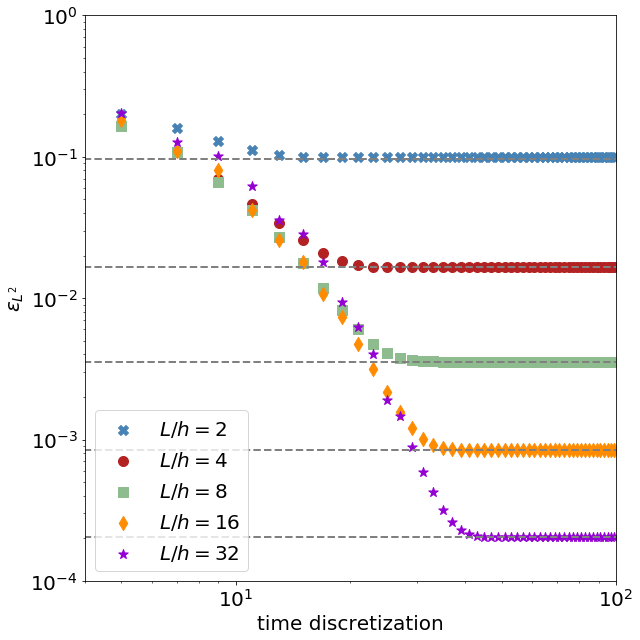

In [3]:
%pylab inline
import matplotlib.pyplot as plt

err_lv0 = array(matrix('5       0.201848;\
7       0.159946;\
9       0.130036;\
11      0.111524;\
13      0.102927;\
15      0.100096;\
17      0.0995135;\
19      0.0995189;\
21      0.0995957;\
23      0.0996463;\
25      0.0996727;\
27      0.0996869;\
29      0.0996956;\
31      0.0997018;\
33      0.0997066;\
35      0.0997105;\
37      0.0997138;\
39      0.0997167;\
41      0.0997191;\
43      0.0997212;\
45      0.099723;\
47      0.0997246;\
49      0.099726;\
51      0.0997272;\
53      0.0997283;\
55      0.0997293;\
57      0.0997302;\
59      0.0997309;\
61      0.0997317;\
63      0.0997323;\
65      0.0997329;\
67      0.0997334;\
69      0.0997339;\
71      0.0997344;\
73      0.0997348;\
75      0.0997352;\
77      0.0997355;\
79      0.0997358;\
81      0.0997362;\
83      0.0997364;\
85      0.0997367;\
87      0.0997369;\
89      0.0997372;\
91      0.0997374;\
93      0.0997376;\
95      0.0997378;\
97      0.0997379;\
99      0.0997381'))

err_lv1 = array(matrix('5       0.16711;\
7       0.108417;\
9       0.0699875;\
11      0.0465219;\
13      0.0337678;\
15      0.0259751;\
17      0.0209824;\
19      0.0182116;\
21      0.0170309;\
23      0.0166645;\
25      0.0165911;\
27      0.0165902;\
29      0.0165977;\
31      0.0166022;\
33      0.0166042;\
35      0.016605;\
37      0.0166053;\
39      0.0166055;\
41      0.0166057;\
43      0.0166058;\
45      0.0166059;\
47      0.016606;\
49      0.0166061;\
51      0.0166062;\
53      0.0166063;\
55      0.0166063;\
57      0.0166064;\
59      0.0166064;\
61      0.0166065;\
63      0.0166065;\
65      0.0166066;\
67      0.0166066;\
69      0.0166066;\
71      0.0166067;\
73      0.0166067;\
75      0.0166067;\
77      0.0166067;\
79      0.0166068;\
81      0.0166068;\
83      0.0166068;\
85      0.0166068;\
87      0.0166068;\
89      0.0166069;\
91      0.0166069;\
93      0.0166069;\
95      0.0166069;\
97      0.0166069;\
99      0.0166069'))

err_lv2 = array(matrix('5       0.164502;\
7       0.107946;\
9       0.0664898;\
11      0.0421356;\
13      0.0269717;\
15      0.0178021;\
17      0.0118625;\
19      0.00819457;\
21      0.00600405;\
23      0.00475976;\
25      0.00410149;\
27      0.00378542;\
29      0.00364715;\
31      0.00358963;\
33      0.00356617;\
35      0.00355726;\
37      0.00355475;\
39      0.00355478;\
41      0.00355546;\
43      0.00355606;\
45      0.00355641;\
47      0.00355659;\
49      0.00355665;\
51      0.00355666;\
53      0.00355665;\
55      0.00355662;\
57      0.0035566;\
59      0.00355658;\
61      0.00355657;\
63      0.00355656;\
65      0.00355655;\
67      0.00355655;\
69      0.00355654;\
71      0.00355654;\
73      0.00355654;\
75      0.00355653;\
77      0.00355653;\
79      0.00355653;\
81      0.00355652;\
83      0.00355652;\
85      0.00355652;\
87      0.00355652;\
89      0.00355652;\
91      0.00355651;\
93      0.00355651;\
95      0.00355651;\
97      0.00355651;\
99      0.00355651'))

err_lv3 = array(matrix('5       0.183325;\
7       0.109046;\
9       0.0800652;\
11      0.0423024;\
13      0.0257276;\
15      0.017971;\
17      0.0107809;\
19      0.00731839;\
21      0.00471816;\
23      0.00317365;\
25      0.00216713;\
27      0.0015546;\
29      0.00119939;\
31      0.00100788;\
33      0.000913267;\
35      0.00086948;\
37      0.000850111;\
39      0.000841827;\
41      0.000838403;\
43      0.000837054;\
45      0.000836571;\
47      0.000836435;\
49      0.00083643;\
51      0.000836468;\
53      0.000836515;\
55      0.000836561;\
57      0.0008366;\
59      0.000836634;\
61      0.000836663;\
63      0.000836687;\
65      0.000836708;\
67      0.000836724;\
69      0.000836738;\
71      0.000836749;\
73      0.000836758;\
75      0.000836765;\
77      0.00083677;\
79      0.000836773;\
81      0.000836776;\
83      0.000836777;\
85      0.000836778;\
87      0.000836779;\
89      0.000836779;\
91      0.000836779;\
93      0.000836778;\
95      0.000836778;\
97      0.000836778;\
99      0.000836778'))

err_lv4 = array(matrix('5       0.204206;\
7       0.126721;\
9       0.100734;\
11      0.0619178;\
13      0.0359087;\
15      0.0283971;\
17      0.0179704;\
19      0.00931252;\
21      0.00624927;\
23      0.00401342;\
25      0.00189381;\
27      0.00145674;\
29      0.000891396;\
31      0.000585318;\
33      0.000427799;\
35      0.000314828;\
37      0.00025959;\
39      0.00022914;\
41      0.00021516;\
43      0.000208694;\
45      0.000205861;\
47      0.000204634;\
49      0.000204116;\
51      0.000203905;\
53      0.000203825;\
55      0.0002038;\
57      0.000203797;\
59      0.000203803;\
61      0.000203811;\
63      0.00020382;\
65      0.000203828;\
67      0.000203836;\
69      0.000203842;\
71      0.000203849;\
73      0.000203854;\
75      0.000203859;\
77      0.000203863;\
79      0.000203867;\
81      0.00020387;\
83      0.000203874;\
85      0.000203876;\
87      0.000203879;\
89      0.000203881;\
91      0.000203883;\
93      0.000203884;\
95      0.000203886;\
97      0.000203887;\
99      0.000203888'))

e_1d_rg1 = array(matrix('0    0.0963859;\
1    0.016603;\
2    0.00355481;\
3    0.000836782;\
4    0.000203894'))

print (2**(e_1d_rg1[:,1]+1))

fig1, ax1 = plt.subplots(figsize=(9,9))

l0 = ax1.plot((0,2000),(e_1d_rg1[0,1],e_1d_rg1[0,1]),color='grey',linestyle='--',linewidth=2)
l1 = ax1.plot((0,2000),(e_1d_rg1[1,1],e_1d_rg1[1,1]),color='grey',linestyle='--',linewidth=2)
l2 = ax1.plot((0,2000),(e_1d_rg1[2,1],e_1d_rg1[2,1]),color='grey',linestyle='--',linewidth=2)
l3 = ax1.plot((0,2000),(e_1d_rg1[3,1],e_1d_rg1[3,1]),color='grey',linestyle='--',linewidth=2)
l4 = ax1.plot((0,2000),(e_1d_rg1[4,1],e_1d_rg1[4,1]),color='grey',linestyle='--',linewidth=2)

c0 = ax1.scatter (err_lv0[:,0],err_lv0[:,1],marker='X',s=100,c='steelblue',label='$L/h = 2$')
c1 = ax1.scatter (err_lv1[:,0],err_lv1[:,1],marker='o',s=100,c='firebrick',label='$L/h = 4$')
c2 = ax1.scatter (err_lv2[:,0],err_lv2[:,1],marker='s',s=100,c='darkseagreen',label='$L/h = 8$')
c3 = ax1.scatter (err_lv3[:,0],err_lv3[:,1],marker='d',s=100,c='darkorange',label='$L/h = 16$')
c4 = ax1.scatter (err_lv4[:,0],err_lv4[:,1],marker='*',s=100,c='darkviolet',label='$L/h = 32$')
ax1.legend(loc=3,fontsize='20')
ax1.set_xlim((4,100))
ax1.set_ylim((0.0001,1))
ax1.set_xscale("log", nonposx='clip')
ax1.set_yscale("log", nonposy='clip')
ax1.set_xlabel('time discretization',fontsize='20')
ax1.set_ylabel('$\epsilon_{L^2}$',fontsize='20')
ax1.tick_params(axis='both', which='major', labelsize='20')

fig1.tight_layout()

savefig('EL_conv.pdf')

## execute the corresponding example and check if above figures can be recovered